In [2]:
library(tidyverse)
theme_set(theme_classic())
options(repr.plot.width  = 10, repr.plot.height = 6)
set.seed(1)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 504
## Week 11: Survival Analysis II & Backblaze data

In [4]:
library(tidyverse)
library(survival)
library(survminer)
library(gtsummary)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




## Backblaze data

 >Each day at each Backblaze data center, we take a snapshot of each operational drive. This snapshot includes basic drive information along with the S.M.A.R.T. statistics reported by that drive. The daily snapshot of one drive is one record or row of data. All of the drive snapshots for a given day are collected into a file consisting of a row for each active drive. The format of this file is a ".csv" (Comma Separated Values) file. Each day this file is named in the format YYYY-MM-DD.csv, for example, 2024-03-25.csv.

‍



In [38]:
bb %>% filter(serial_number == "WD-WX31DB48X22V") %>% print

# A tibble: 18 × 91
   date       serial_number   model capacity_bytes failure datacenter cluster_id
   <date>     <chr>           <fct>          <dbl>   <dbl> <fct>      <fct>     
 1 2024-04-01 WD-WX31DB48X22V WDC …  6001175126016       0 sac0       000       
 2 2024-04-02 WD-WX31DB48X22V WDC …  6001175126016       0 sac0       000       
 3 2024-04-03 WD-WX31DB48X22V WDC …  6001175126016       0 sac0       000       
 4 2024-04-04 WD-WX31DB48X22V WDC …  6001175126016       0 sac0       000       
 5 2024-04-05 WD-WX31DB48X22V WDC …  6001175126016       0 sac0       000       
 6 2024-04-06 WD-WX31DB48X22V WDC …  6001175126016       0 sac0       000       
 7 2024-04-07 WD-WX31DB48X22V WDC …  6001175126016       0 sac0       000       
 8 2024-04-08 WD-WX31DB48X22V WDC …  6001175126016       0 sac0       000       
 9 2024-04-09 WD-WX31DB48X22V WDC …  6001175126016       0 sac0       000       
10 2024-04-10 WD-WX31DB48X22V WDC …  6001175126016       0 sac0       000       
11 2024-

In [60]:
bb %>% distinct(serial_number, model, datacenter, cluster_id) -> bb_models
bb_models

In [87]:
# slow
bb_ls <- bb %>% group_by(serial_number) %>%
       summarize(days=max(date) - min(date), n=n(), f=sum(failure), 
                 across(c(smart_5_raw, smart_9_raw, smart_197_raw), \(v) max(v, na.rm=T)))

Warning message:
“There were 11397 warnings in `summarize()`.
The first warning was:
ℹ In argument: `across(...)`.
ℹ In group 1: `serial_number = "000a43e7dee60010"`.
Caused by warning in `max()`:
! no non-missing arguments to max; returning -Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 11396 remaining warnings.”


In [81]:
bb_ls %>% filter(s9 > -Inf)

serial_number,days,n,f,s9
<chr>,<drtn>,<int>,<dbl>,<dbl>
1030A001F97G,90 days,91,0,32176
1030A007F97G,90 days,91,0,28580
1030A009F9RG,90 days,91,0,16174
1030A00CF9RG,90 days,91,0,31221
1030A00DF97G,90 days,91,0,24390
1030A00DF9RG,90 days,91,0,31242
1030A00KF97G,90 days,91,0,31290
1030A00KF9RG,90 days,91,0,24219
1030A00MF9RG,82 days,83,0,1969


Joining with `by = join_by(serial_number)`


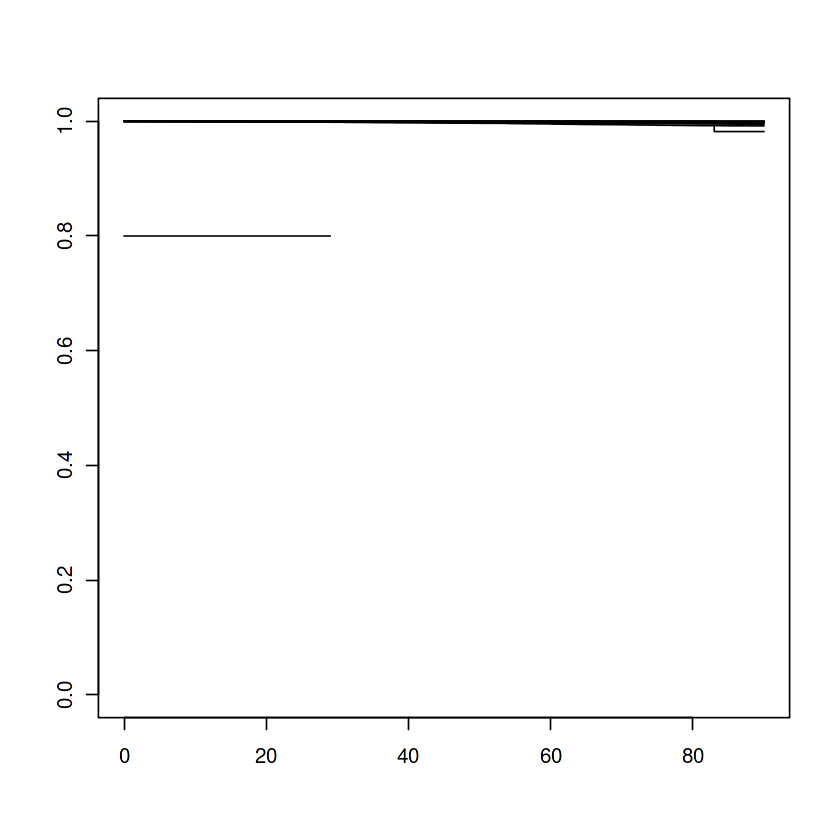

In [67]:
bb_ls %>% left_join(bb_models) %>% survfit(Surv(days, f) ~ str_sub(model, 1, 2), data=.) %>% plot

In [74]:
bb_ls %>% filter(f > 0) %>% head

serial_number,days,n,f,s9
<chr>,<drtn>,<int>,<dbl>,<dbl>
1060A01MF97G,13 days,13,1,33196
10B0A0RDF97G,22 days,22,1,36752
10C0A0BAF97G,13 days,10,1,33881
10L0A04BF97G,31 days,32,1,36571
10N0A03XF97G,24 days,25,1,36407
10S0A01FFV8G,44 days,45,1,29681


In [75]:
bb %>% filter(serial_number == "10S0A01FFV8G") %>% summary

      date            serial_number                       model   
 Min.   :2024-04-01   Length:45          TOSHIBA MG08ACA16TEY:45  
 1st Qu.:2024-04-12   Class :character   CT250MX500SSD1      : 0  
 Median :2024-04-23   Mode  :character   DELLBOSS VD         : 0  
 Mean   :2024-04-23                      HGST HDS5C4040ALE630: 0  
 3rd Qu.:2024-05-04                      HGST HDS724040ALE640: 0  
 Max.   :2024-05-15                      HGST HMS5C4040ALE640: 0  
                                         (Other)             : 0  
 capacity_bytes       failure        datacenter cluster_id    vault_id   
 Min.   :1.6e+13   Min.   :0.00000   ams5:45    000: 0     Min.   :2005  
 1st Qu.:1.6e+13   1st Qu.:0.00000   iad1: 0    020: 0     1st Qu.:2005  
 Median :1.6e+13   Median :0.00000   phx1: 0    031:45     Median :2005  
 Mean   :1.6e+13   Mean   :0.02222   sac0: 0    040: 0     Mean   :2005  
 3rd Qu.:1.6e+13   3rd Qu.:0.00000   sac2: 0    050: 0     3rd Qu.:2005  
 Max.   :1.6e+13   M

## SMART Attributes 

- Self-Monitoring, Analysis, and Reporting Technology ([SMART](https://en.wikipedia.org/wiki/Self-Monitoring,_Analysis_and_Reporting_Technology))
- Built-in monitoring system for hard drives
- Reports various operational metrics and health indicators
- Early warning system for potential hardware failures

## Some important SMART Attributes
- SMART 5: Reallocated Sectors Count
- SMART 9: Number of powered-on hours
- SMART 187: Reported Uncorrectable Errors
- SMART 188: Command Timeout
- SMART 197: Current Pending Sector Count
- SMART 198: Offline Uncorrectable

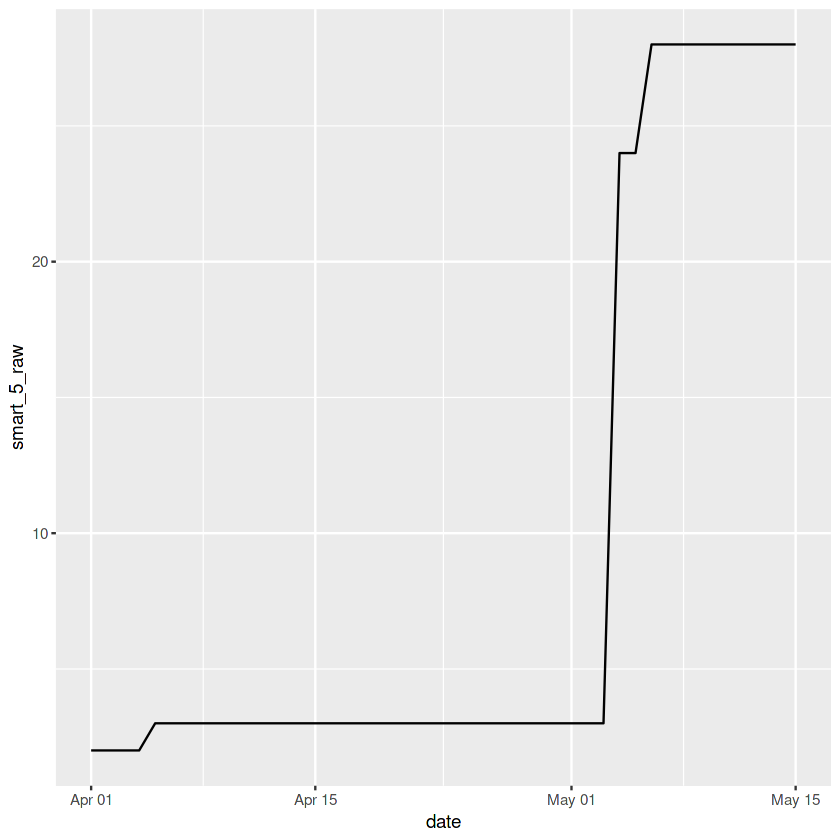

In [51]:
bb %>% filter(serial_number == "10S0A01FFV8G") %>% ggplot + 
    geom_line(aes(x=date, y=smart_5_raw))

In [54]:
lm(failure ~ smart_5_raw, data=bb) %>% summary


Call:
lm(formula = failure ~ smart_5_raw, data = bb)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01240 -0.00004 -0.00004 -0.00004  0.99996 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.100e-05  1.354e-06   30.29   <2e-16 ***
smart_5_raw 1.886e-07  1.455e-09  129.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006873 on 25809439 degrees of freedom
  (212828 observations deleted due to missingness)
Multiple R-squared:  0.0006511,	Adjusted R-squared:  0.000651 
F-statistic: 1.682e+04 on 1 and 25809439 DF,  p-value: < 2.2e-16


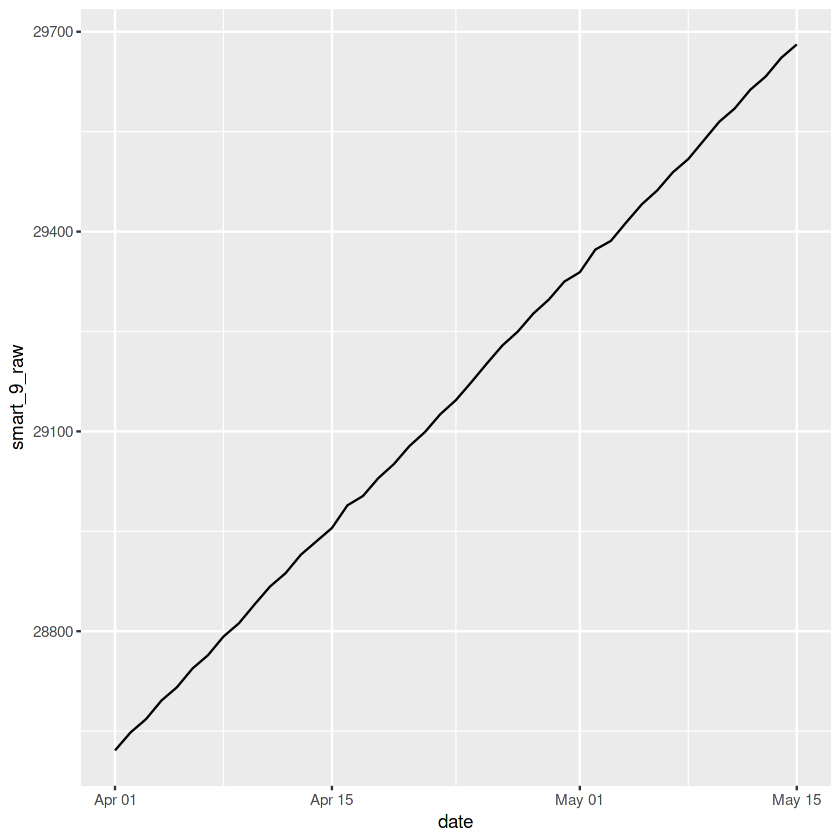

In [69]:
bb %>% filter(serial_number == "10S0A01FFV8G") %>% ggplot + geom_line(aes(x=date, y=smart_9_raw))

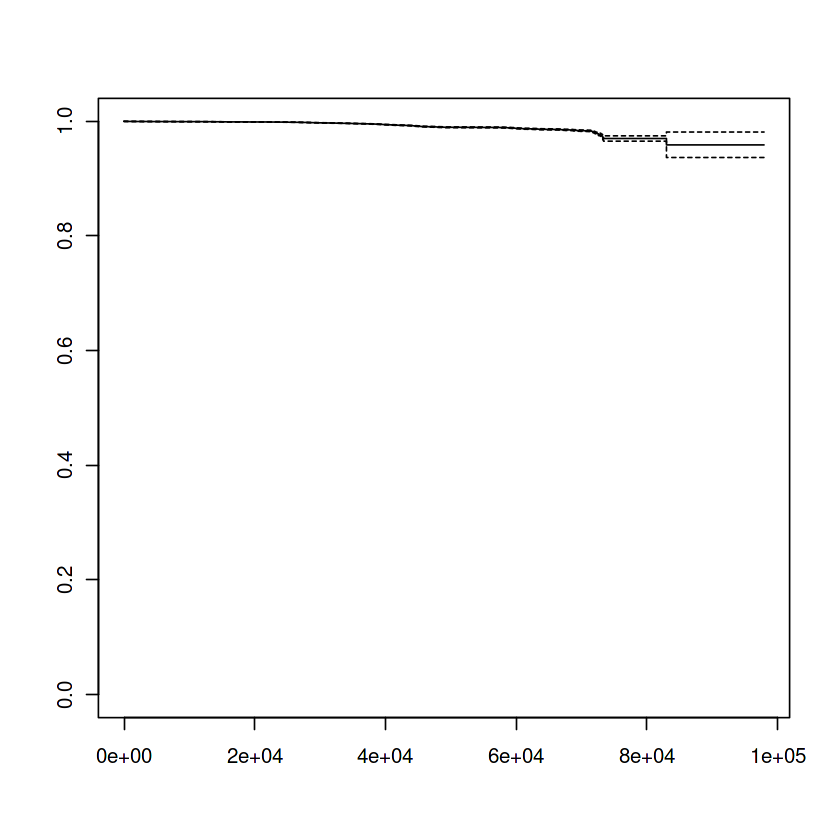

In [86]:
survfit(Surv(s9, f) ~ 1, data=bb_ls) %>% plot

## Correlation with Failures
- Certain SMART attributes show strong correlations with impending drive failures
- Results of [Google study](http://research.google.com/archive/disk_failures.pdf):
    * In the 60 days following the first uncorrectable error on a drive (SMART 198) detected as a result of an offline scan, the drive was, on average, 39 times more likely to fail than a similar drive for which no such error occurred.
    * First errors in reallocations, offline reallocations (SMART 5/196) and probational counts (SMART 197) were also strongly correlated to higher probabilities of failure. 
    * But little correlation was found for increased temperature and no correlation for usage level. 
    * A large proportion (56%) of the failed drives failed without recording any count in the "four strong S.M.A.R.T. warnings" identified as scan errors, reallocation count, offline reallocation, and probational count. 
    * 36% of failed drives did so without recording any S.M.A.R.T. error at all, except the temperature, meaning that S.M.A.R.T. data alone was of limited usefulness in anticipating failures.

## Proportional hazards regression
- The K-M estimator is _non-parametric_; it estimates a whole function without assuming any model.
- If we want to be able to interpret the effect of different covariates on survival, we need a model which relates
the covariates to the outcome (lifespan).
    - We are going to model the hazard rate function directly. 
    - The approach we will use is similar to how we used generalized linear modeling to allow differences in the mean parameter for various distributions.

### The Cox model
- Let $\mathbf{Z}$ be a vector of individual-specific covariates.
- The proportional hazards model assumes that $$h(t\mid \mathbf{Z}) = h_0(t)c(\beta^\intercal \mathbf{Z}),$$ where $h_0$ is an unknown baseline hazard rate and $\mathbf{Z}\in\mathbb{R}^p$ is a vector of predictors.
- $c(\cdot)$ is analagous to the link function in GLM. 
- The natural choice is $c=\exp$, leading to the famous Cox model.

### Interpretation
- Let $S_0(t)=\exp(-\int_0^t h_0(s)\,ds)$ be the baseline survival function.
- Then $$S(t\mid \mathbf{Z}) = \exp\left(-\int_0^t h(s\mid \mathbf{Z})\,ds\right) = S_0(t)^{e^{\mathbf{Z}^\intercal \beta}}$$
- Additionally, $\log h(t\mid\mathbf{Z}) = \log h_0(t) + \mathbf{Z}^\intercal \beta$, so $\log h_0(t)$ is a sort of intercept term.
- The Cox model is essentially a multiple linear regression of the log hazard on covariates. 
- This is known as a **semi-parametric** model: there is a parametric (finite dimensional) component $\beta$ as well as an infinite dimensional parameter $h_0(t)$.

### Proportional hazards property
As already remarked, the Cox model has the proportional hazards property:
   - Let $\mathbf{Z},\mathbf{Z}^*$ be covariates for two different patients.
   - Then $$\frac{h(t\mid\mathbf{Z})}{h(t\mid\mathbf{Z}^*)} = \exp[\beta(\mathbf{Z}-\mathbf{Z}^*)],$$ i.e. it is constant over time.
   - In particular, if there is a single treatment effect $\beta$, the hazard ratio is $e^\beta$, similar to logistic regression.

## Estimating the proportional hazards model
- Estimation is complicated by the fact that part of the model $h_0(t)$ is infinite dimensional.
- Cox's brilliant insight was that it is possible to estimate $\beta$ in spite of this!
- To overcome this we use a technique called *partial likelihoods*.
    - Say we observe deaths at times $t_1,\dots,t_D$.
    - The person who died at time $t_i$ is denoted "person $i$" and has covariates $\mathbf{Z}_i$.  (As usual, we assume no ties.)
    - Assuming no ties and independence between the life spans, we have
$$\mathbb{P}(\text{data}) = \prod_{i=1}^D \underbrace{\mathbb{P}(\text{person $i$ died}\mid\text{somebody died at $t_i$})}_\text{(I)} \underbrace{\mathbb{P}(\text{somebody died at $t_i$})}_\text{(II)}$$
    - Term (I) is simply the softmax function which we studied in multinomial logit: $$\frac{\exp(\mathbf{Z}_i^\intercal \beta)}{\sum_{j\in R(t_i)} \exp(\mathbf{Z}_j^\intercal \beta)}.$$ Here, the summation is over the set $R(t_i)$ of people who are at risk at time $t_i$.


## The partial likelihood
- The partial likelihood is formed by considering the product of term (I) only. That is, we condition on the observed death times $t_1,\dots,t_D$ and do not use them for inference: $$L(\beta) = \prod_i \frac{\exp(\mathbf{Z}_i^\intercal \beta)}{\sum_{j\in R(t_i)} \exp(\mathbf{Z}_j^\intercal \beta)}.$$

## The MPLE
- To fit the partial likelihood we maximize $\text{LL}(\beta)=\log L(\beta)$ with respect to $\beta$, obtaining the *maximum partial likelihood estimator* (MPLE).
- This can be accomplished by setting the score functions $$U_h = \frac{\partial \log L(\beta)}{\beta_h}=\sum_{i=1}^D Z_{ih} - \frac{\sum_{j\in R(t_i)} Z_{jh} \exp(\mathbf{Z}_j^\intercal \beta)}{\sum_{j\in R(t_i)} \exp(\mathbf{Z}_j^\intercal \beta)}$$ to zero.

## Fitting the proportional hazards model
The command ``coxph`` is used to fit the Cox model in R.

In [100]:
bb_ls %>% filter(smart_9_raw > -Inf, smart_5_raw > -Inf, smart_197_raw > -Inf) %>%
    coxph(Surv(smart_9_raw, f) ~ smart_197_raw + smart_5_raw, data = .) -> cfit
summary(cfit)

Call:
coxph(formula = Surv(smart_9_raw, f) ~ smart_197_raw + smart_5_raw, 
    data = .)

  n= 287358, number of events= 1202 

                   coef exp(coef)  se(coef)     z Pr(>|z|)    
smart_197_raw 2.507e-05 1.000e+00 2.121e-06 11.82   <2e-16 ***
smart_5_raw   6.994e-05 1.000e+00 1.860e-06 37.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              exp(coef) exp(-coef) lower .95 upper .95
smart_197_raw         1     1.0000         1         1
smart_5_raw           1     0.9999         1         1

Concordance= 0.81  (se = 0.009 )
Likelihood ratio test= 612.9  on 2 df,   p=<2e-16
Wald test            = 1628  on 2 df,   p=<2e-16
Score (logrank) test = 7761  on 2 df,   p=<2e-16


### Interpreting the Cox model

Similar to logistic regression:

- A negative coefficient estimator means the hazard decreases with increasing values of the variable.
- A one-unit increase in covariate causes the hazard ratio to increase/decrease by $\exp(\beta)$

### Assumptions of the Cox model

- Hazards are actually proportional!
- Covariates and coefficients do not depend on time.
- Log hazard is a linear function of the covariates.

### Survival of baseball players

- "The Longevity of Baseball Hall of Famers Compared to Other Players", Abel and Kruger (2005).
- Using a Cox proportional hazards model, found that median survival after being inducted into the Hall of Fame was 5 years shorter than for noninducted players (18 vs. 23 years, respectively).


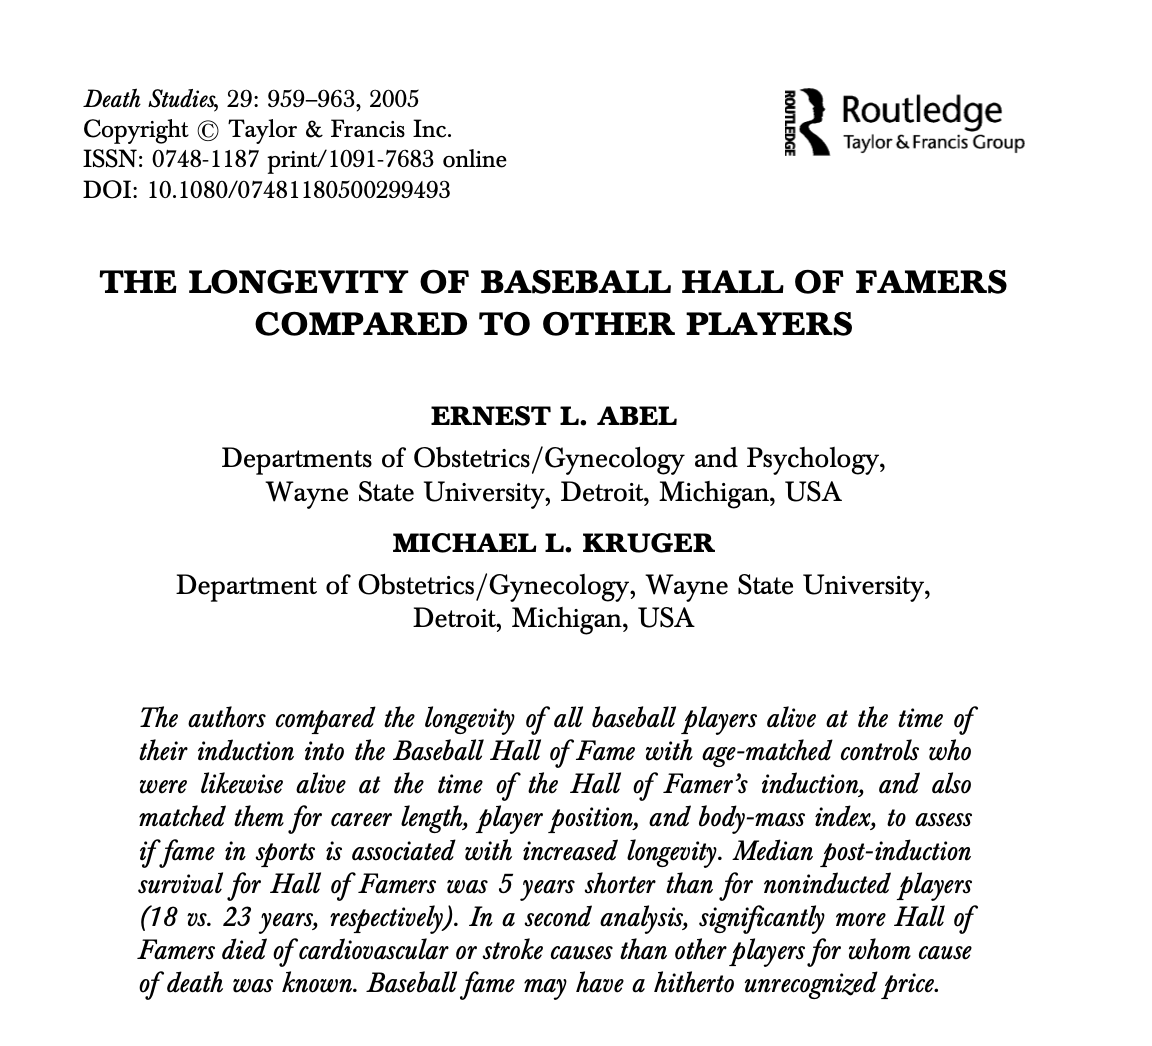

> "Cox  Proportional-hazards  Survival analysis was used to determine whether differences in survival between the groups were significant, controlling for career length,player position, and body mass index (BMI)."

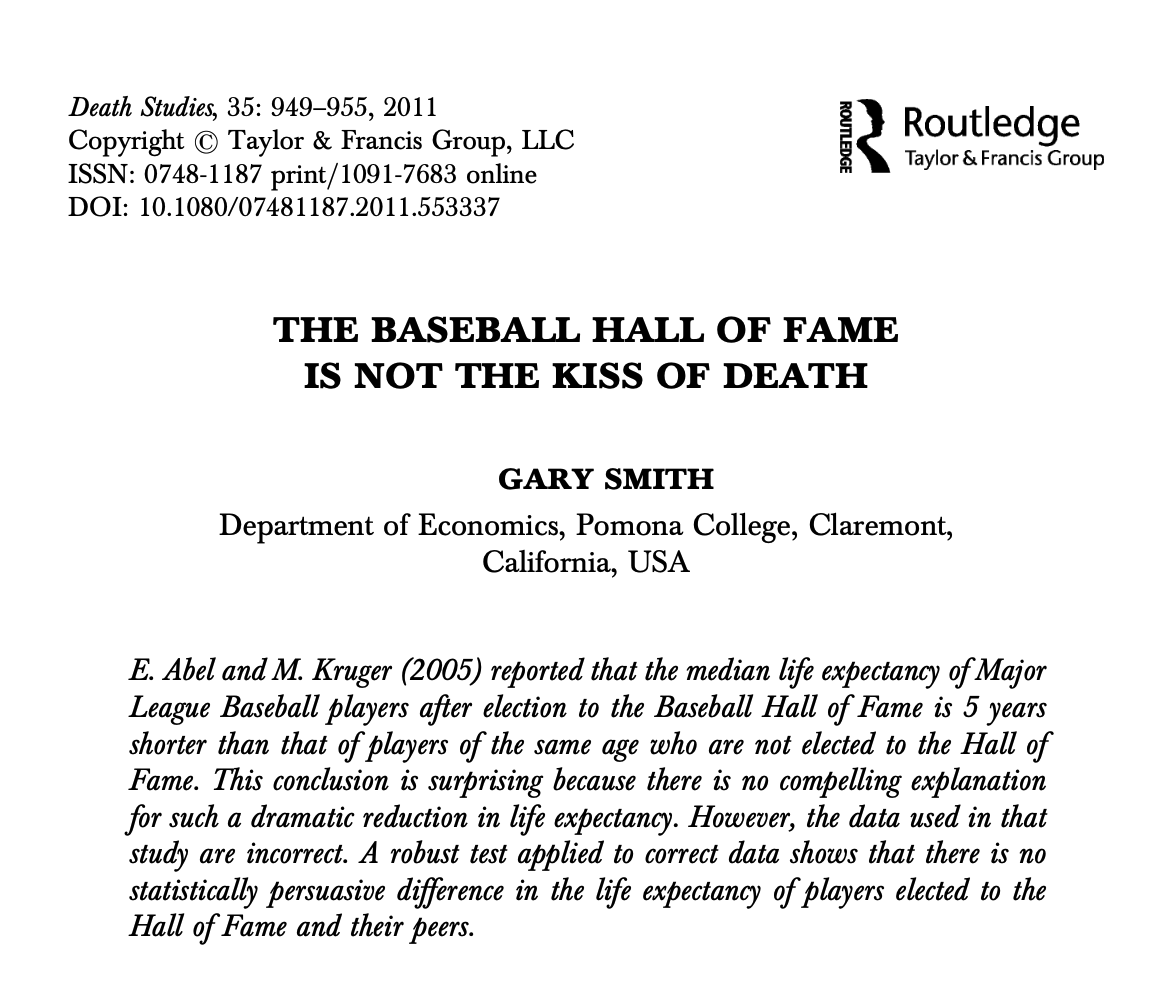

In [115]:
library(Lahman)

HallOfFame$category %>% table

.
          Manager Pioneer/Executive            Player            Umpire 
               74                44              4195                10 

In [82]:
xtabs(~  category + inducted, data = HallOfFame)

                   inducted
category               N    Y
  Manager             51   23
  Pioneer/Executive    7   37
  Player            3925  270
  Umpire               0   10

In [164]:
library(lubridate)
People %>% select(debut, finalGame) %>% 
    mutate(span = ymd(finalGame) - ymd(debut)) %>% 
    head

,debut,finalGame,span
,<chr>,<chr>,<drtn>
1,2004-04-06,2015-08-23,4156 days
2,1954-04-13,1976-10-03,8209 days
3,1962-04-10,1971-09-26,3456 days
4,1977-07-26,1990-10-03,4817 days
5,2001-09-10,2006-04-13,1676 days
6,2010-07-28,2021-10-01,4083 days


In [165]:
HallOfFame %>% left_join(People) %>% 
    mutate(span = ymd(finalGame) - ymd(debut)) %>% 
    select(playerID, yearID, nameFirst, nameLast, birthYear, deathYear, span,
           inducted, category) %>% 
    mutate(event = !is.na(deathYear), 
           life = ifelse(event,  # death
                         deathYear - yearID,  # years until death
                         2023 - yearID  # years since voted on
                        )) %>% 
    filter(life > 0) -> 
    hof_surv

Joining with `by = join_by(playerID)`


In [170]:
library(survival)
library(survminer)

bb_fit <- coxph(Surv(life, event) ~ inducted * category, data = hof_surv)
summary(bb_fit)

Call:
coxph(formula = Surv(life, event) ~ inducted * category, data = hof_surv)

  n= 3798, number of events= 2617 

                                        coef exp(coef) se(coef)      z Pr(>|z|)
inductedY                            1.40315   4.06800  0.34327  4.088 4.36e-05
categoryPioneer/Executive            1.39152   4.02097  0.41223  3.376 0.000737
categoryPlayer                       0.04394   1.04492  0.16358  0.269 0.788211
categoryUmpire                       1.08583   2.96189  0.53992  2.011 0.044316
inductedY:categoryPioneer/Executive -0.99866   0.36837  0.71485 -1.397 0.162409
inductedY:categoryPlayer            -1.01645   0.36188  0.35486 -2.864 0.004178
inductedY:categoryUmpire                  NA        NA  0.00000     NA       NA
                                       
inductedY                           ***
categoryPioneer/Executive           ***
categoryPlayer                         
categoryUmpire                      *  
inductedY:categoryPioneer/Executive    
ind

## A complete survival analysis 
- Let's walk through a complete survival analysis using K-M.

These note follow Ch. 2 of ["Survival Analysis in R"](https://bookdown.org/mpfoley1973/survival/).

In [10]:
d_lung <- survival::lung %>%
  filter(!is.na(ph.ecog)) %>%
  mutate(
    ph.ecog = factor(
      ph.ecog,
      levels = c(0, 1, 2, 3, 4),
      labels = c("Asymptomatic", "Ambulatory", "In bed <50%", "In bed >50%", "Bedridden")),
    ph.ecog = fct_drop(ph.ecog),
    ph.ecog = fct_lump_n(ph.ecog, n = 2, other_level = "Bedridden"),
    sex = factor(sex, levels = c(1, 2), labels = c("Male", "Female")),
    age_bin = cut(age, breaks = c(38, 55, 65, 83)),
    patient_id = row_number()
  )

In [11]:


(m_fit <- survfit(Surv(time, status) ~ ph.ecog, data = d_lung))

Call: survfit(formula = Surv(time, status) ~ ph.ecog, data = d_lung)

                       n events median 0.95LCL 0.95UCL
ph.ecog=Asymptomatic  63     37    394     348     574
ph.ecog=Ambulatory   113     82    306     268     429
ph.ecog=Bedridden     51     45    183     153     288

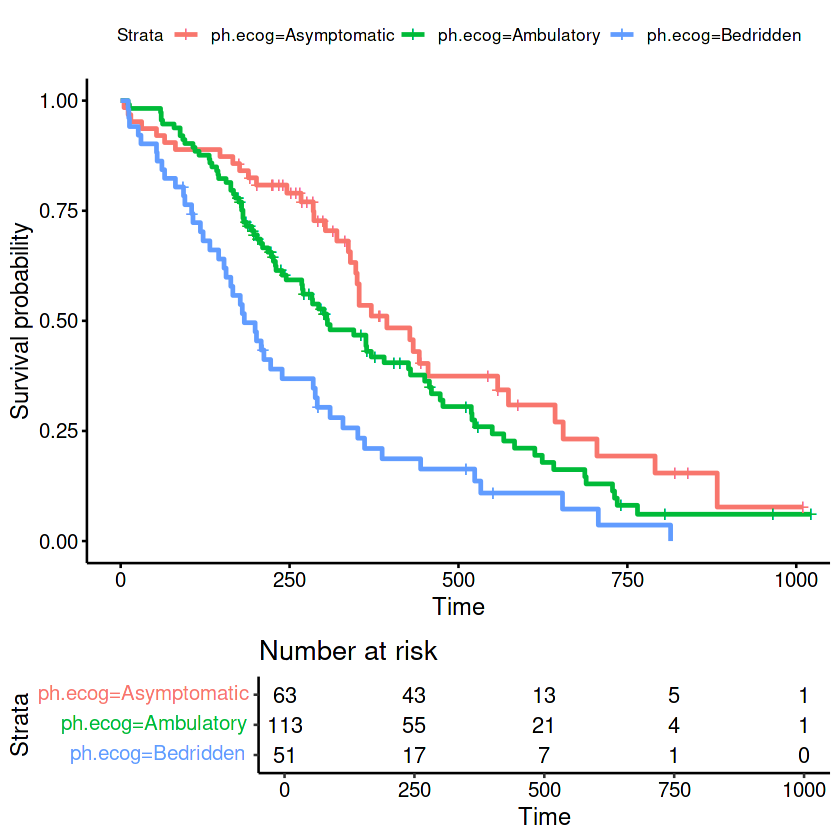

In [12]:
ggsurvplot(m_fit, risk.table = TRUE)

Call: survfit(formula = Surv(time, status) ~ sex, data = d_lung)

             n events median 0.95LCL 0.95UCL
sex=Male   137    111    270     218     320
sex=Female  90     53    426     348     550

Warning message in .add_surv_median(p, fit, type = surv.median.line, fun = fun, :
“Adding survival median lines is not allowed when fun is: cumhaz”


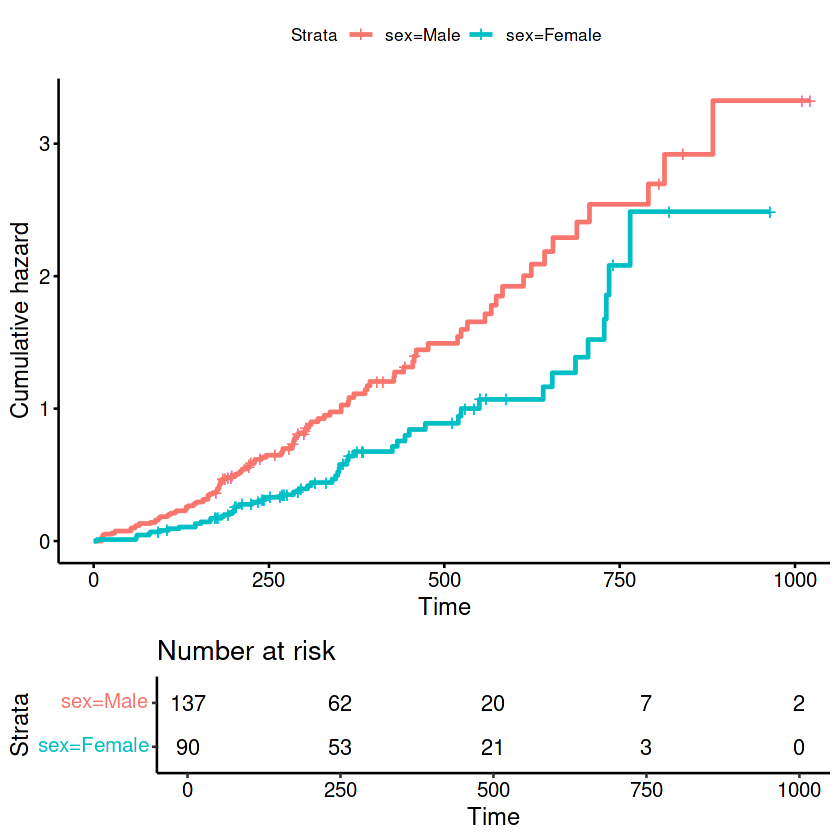

In [22]:
(km_fit <- survfit(Surv(time, status) ~ sex, data = d_lung))
ggsurvplot(km_fit, risk.table = TRUE, surv.median.line = "hv", fun = "cumhaz")

## Testing for differences in survival

- How can we test whether there is a significant difference in survival between different groups?
- Idea: $$H_0: h_0(t) = h_1(t)$$ versus $$H_1: h_0(t) = \lambda h_1(t)$$ for some $\lambda\neq 1$.
- Under $H_0$, appropriate test statistic has approximately Normal(0,1) distribution.

In [20]:
(km_diff <- survdiff(Surv(time, status) ~ sex, data = d_lung))

Call:
survdiff(formula = Surv(time, status) ~ sex, data = d_lung)

             N Observed Expected (O-E)^2/E (O-E)^2/V
sex=Male   137      111       91      4.42        10
sex=Female  90       53       73      5.50        10

 Chisq= 10  on 1 degrees of freedom, p= 0.002 

In [19]:
(km_diff <- survdiff(Surv(time, status) ~ ph.ecog, data = d_lung))

Call:
survdiff(formula = Surv(time, status) ~ ph.ecog, data = d_lung)

                       N Observed Expected (O-E)^2/E (O-E)^2/V
ph.ecog=Asymptomatic  63       37     54.2    5.4331    8.2119
ph.ecog=Ambulatory   113       82     83.5    0.0279    0.0573
ph.ecog=Bedridden     51       45     26.3   13.2582   15.9641

 Chisq= 19  on 2 degrees of freedom, p= 8e-05 

How about comparing the median time to survival?

In [29]:
surv_median(km_fit)

Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
ℹ Please use `select()` instead.
ℹ The deprecated feature was likely used in the survminer package.
  Please report the issue at <https://github.com/kassambara/survminer/issues>.”


strata,median,lower,upper
<chr>,<dbl>,<dbl>,<dbl>
sex=Male,270,218,320
sex=Female,426,348,550


       chisq df   p
sex      2.7  1 0.1
GLOBAL   2.7  1 0.1

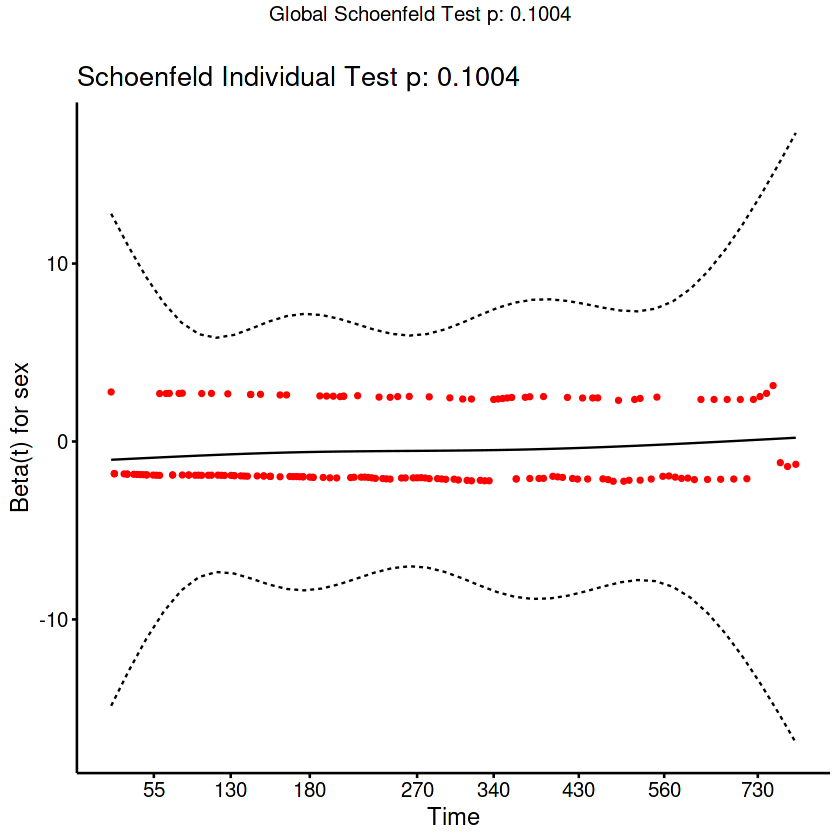

### Survival of baseball players

- "The Longevity of Baseball Hall of Famers Compared to Other Players", Abel and Kruger (2005).
- Using a Cox proportional hazards model, found that median survival after being inducted into the Hall of Fame was 5 years shorter than for noninducted players (18 vs. 23 years, respectively).


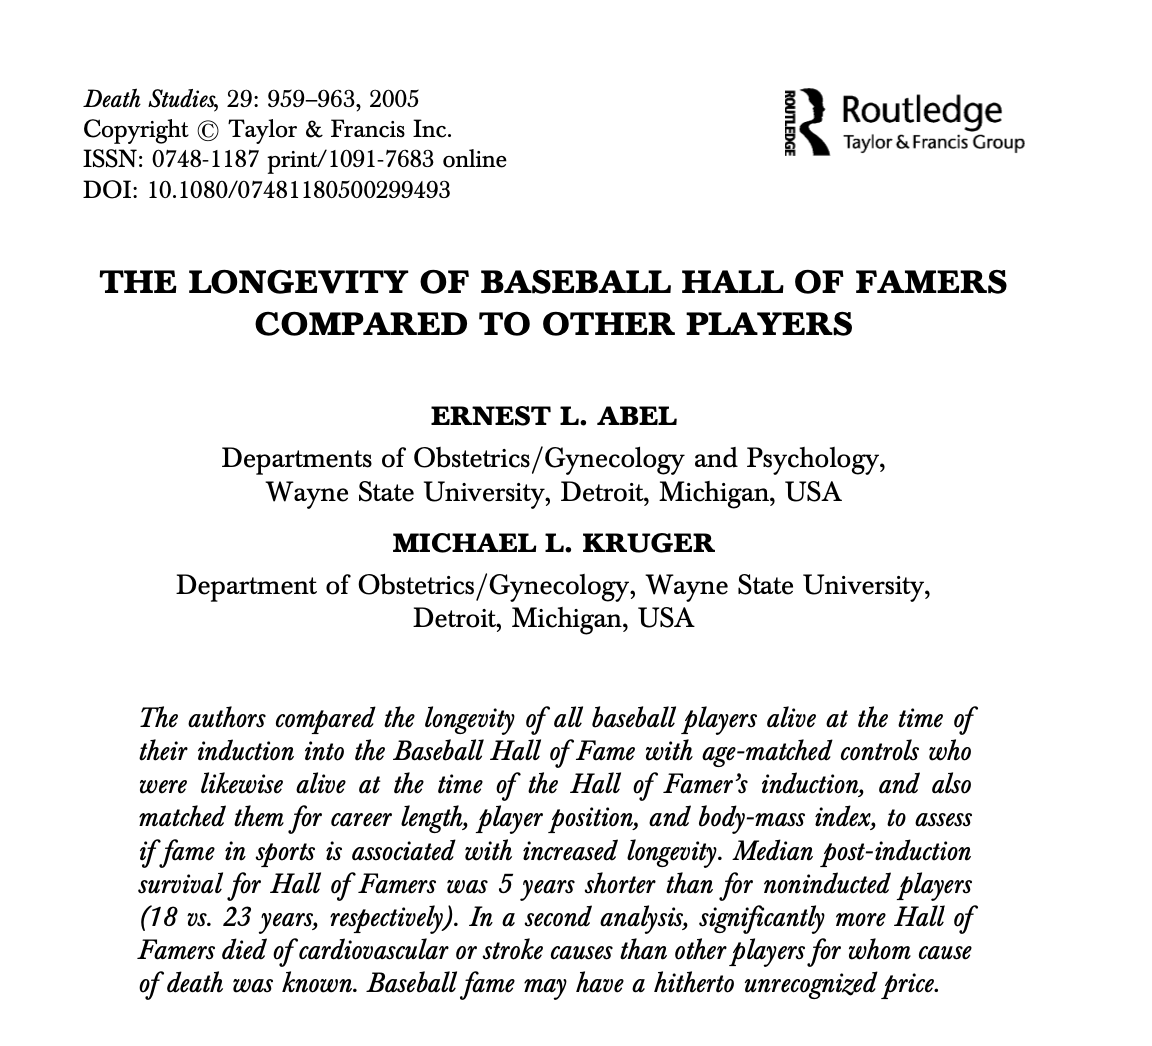

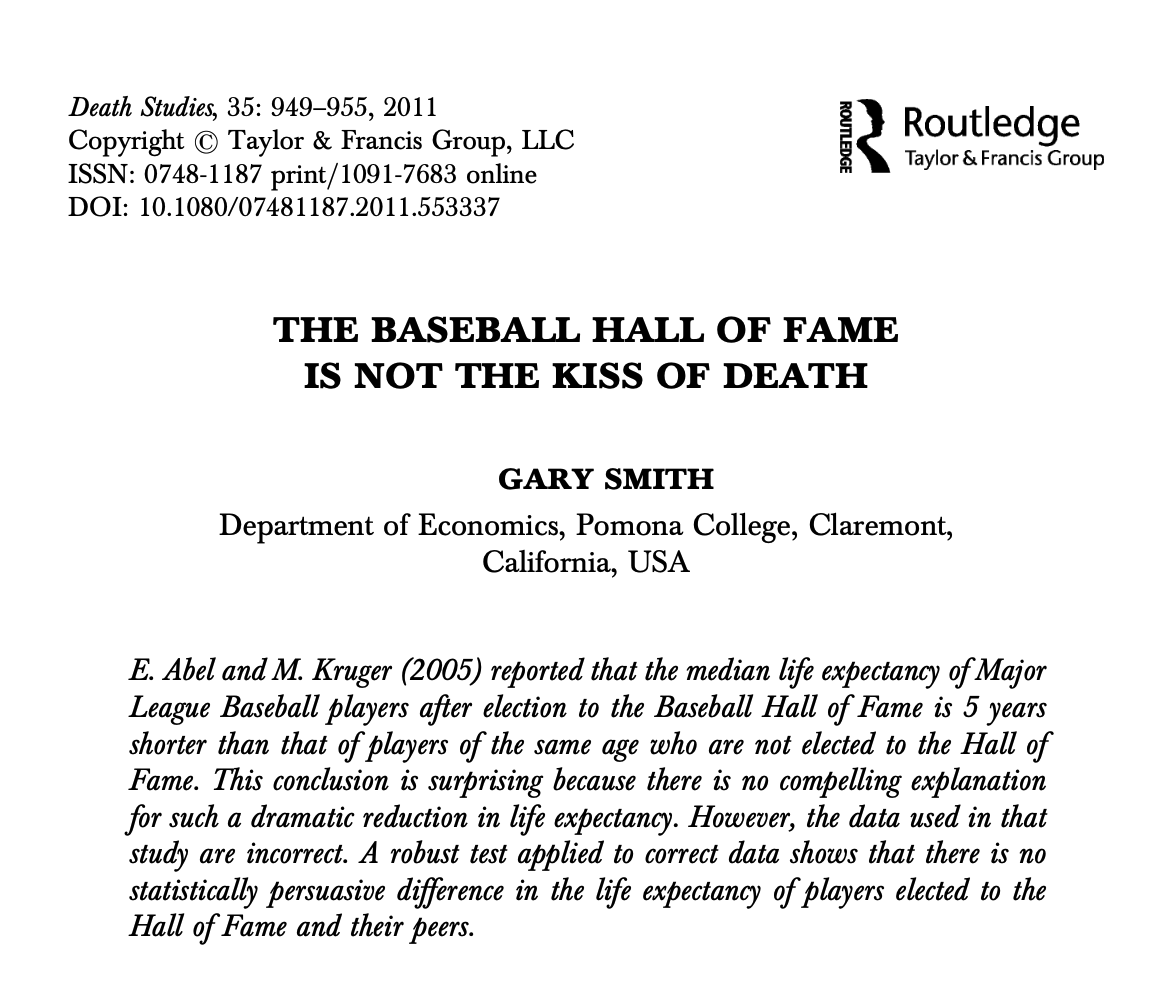

In [76]:
library(Lahman)
HallOfFame %>% head

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>
1,cobbty01,1936,BBWAA,226,170,222,Y,Player,NA
2,ruthba01,1936,BBWAA,226,170,215,Y,Player,NA
3,wagneho01,1936,BBWAA,226,170,215,Y,Player,NA
4,mathech01,1936,BBWAA,226,170,205,Y,Player,NA
5,johnswa01,1936,BBWAA,226,170,189,Y,Player,NA
6,lajoina01,1936,BBWAA,226,170,146,N,Player,NA


In [82]:
xtabs(~  category + inducted, data = HallOfFame)

                   inducted
category               N    Y
  Manager             51   23
  Pioneer/Executive    7   37
  Player            3925  270
  Umpire               0   10

In [85]:
People %>% colnames

[1] "playerID"     "birthYear"    "birthMonth"   "birthDay"     "birthCountry"
 [6] "birthState"   "birthCity"    "deathYear"    "deathMonth"   "deathDay"    
[11] "deathCountry" "deathState"   "deathCity"    "nameFirst"    "nameLast"    
[16] "nameGiven"    "weight"       "height"       "bats"         "throws"      
[21] "debut"        "finalGame"    "retroID"      "bbrefID"      "deathDate"   
[26] "birthDate"

In [104]:
HallOfFame %>% left_join(People) %>% 
    filter(deathYear > yearID | is.na(deathYear)) %>% 
    mutate(
        event = !is.na(deathYear),
        life_after_vote = ifelse(event, deathYear - yearID, 2024 - yearID)
    ) %>% 
    select(birthYear, yearID, deathYear, life_after_vote, event, category, inducted) ->
    bb_surv

Joining with `by = join_by(playerID)`


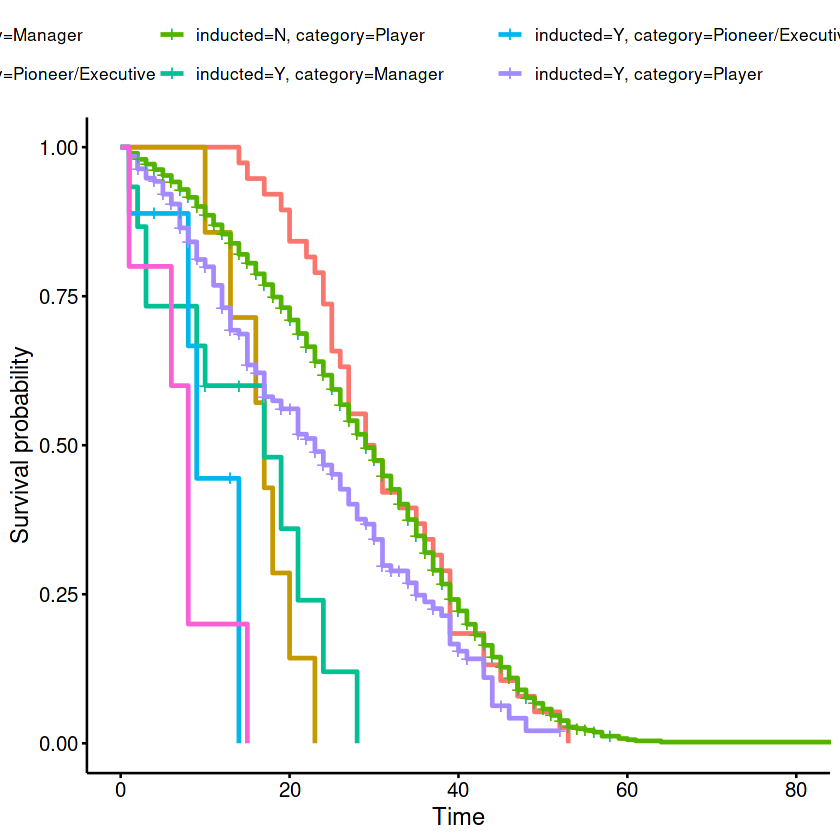

In [107]:
survfit(Surv(life_after_vote, event) ~ inducted + category, data = bb_surv) %>% ggsurvplot

## Machine learning methods in survival analysis

- We have studied three ways of estimating survival:
    - Nonparametric (Kaplan-Meier):
        - Pros: no assumptions about the survival distribution.
        - Cons: cannot accomodate covariates.
    - Semi-parametric (Cox regression):
        - Pros: allows covariates; somewhat interpretable.
        - Cons: proportional hazards assumption may not be realistic.
    - Parametric (Weibull / log-logistic / etc. regression)
        - Pros: very interpretable. straightforward theory.
        - Cons: too simplistic in some cases.

### Random survival forests
- Today we will look at a technique, random survival forests (RSF), that tries to combine the strengths of these three approaches.
- We will estimate the cumulative hazard function $\hat{H}(t)$ (aka CHF) in a way that
    - Places minimal assumptions on the true function $H(t)$, 
    - Can depend on covariates, and is
    - (somewhat) interpretable 

### Bagging
- Bagging stands for "bootstrap aggregation".
- Suppose we have training data $\mathbf{Z}=\{(x_1,y_1),\dots,(x_N,y_N)\}$. Using whatever method, we obtain a prediction function $\hat{y}=\hat{f}(x\mid\mathbf{Z})$.
- Now suppose instead of fitting one training function, we form bootstrap replicates $\mathbf{Z}^*_1,\dots,\mathbf{Z}^*_B$ from the training data and use each to form a prediction function $$\hat{f}(x\mid \mathbf{Z}^*_b),\quad b=1,\dots,B.$$
- The "bagged" prediction function is $$\hat{f}^*(x\mid\mathbf{Z}) = \frac{1}{B}\sum_b \hat{f}(x\mid \mathbf{Z}_b^*)=\frac{1}{B}\sum_b \hat{f}_b(x)$$

### Why bagging works
- Let the true distribution of the the $x_i$ be denoted $\mathcal{P}$.
- The true regression function is $f(x)$, so that $\hat{f}_b(x)=f(x)+\epsilon_b(x)$.
- The average error of the un-bagged predictors is $$E_\text{avg} = \frac{1}{B} \mathbb{E}_x\left\{[\hat{f}_b(x)-f(x)]^2\right\}=\frac{1}{B}\sum_b\mathbb{E}_x[\epsilon_b(x)^2].$$

- If the errors are zero-mean, variance $\sigma^2$ and $\rho=\operatorname{cor}[\epsilon_i(x),\epsilon_j(x)]$ then
he average error of the bagged regression function is $$E_\text{bag}=\mathbb{E}_x \left\{\left[ \frac{1}{B} \sum_b \epsilon_b(x)\right]^2 \right\} = \rho \sigma^2 + \frac{1-\rho}{B}\sigma^2$$
- In particular, if $\rho=0$ then  $E_\text{bag} = E_\text{avg}/ B$.
- Goal is to make $\rho$ small. This is what RF tries to achieve by randomly subsetting the predictors over which splits are computed.

### The random survival forest algorithm
1. Draw $B$ bootstrap samples from the data. For each sample, record also the OOB (out-of-bag) portion of the sample.
2. Grow a survival tree for each bootstrap sample. Keep growing until all terminal nodes have no less than $d_0>0$ unique deaths.
3. Calculate a CHF for each tree. Average to obtain the ensemble CHF.

## Understanding variable importance
- Ensemble methods can be difficult to interpret.
- The authors suggest the following measure of variable importance: 
    - Drop the OOB cases on each tree. Each time the focal predictor $X$ is encountered in a decision rule, pick a random branch.
    - Variable importance is defined as the difference in prediction error between this and the ensemble prediction.

In [171]:
# install.packages("randomForestSRC")

library(randomForestSRC)

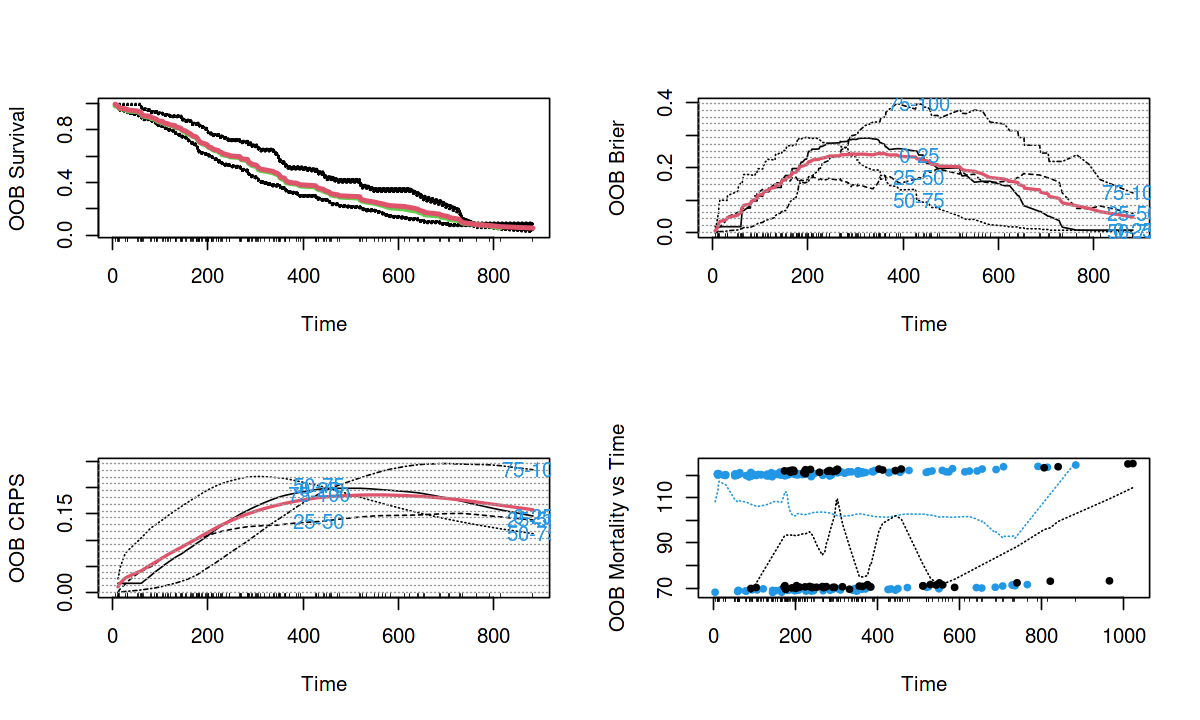

In [179]:
library(randomForestSRC)
d_lung %>% mutate(status = status - 1) %>% 
    rfsrc(Surv(time, status) ~ sex, data = .) %>% 
    plot.survival(show.plots = 1)

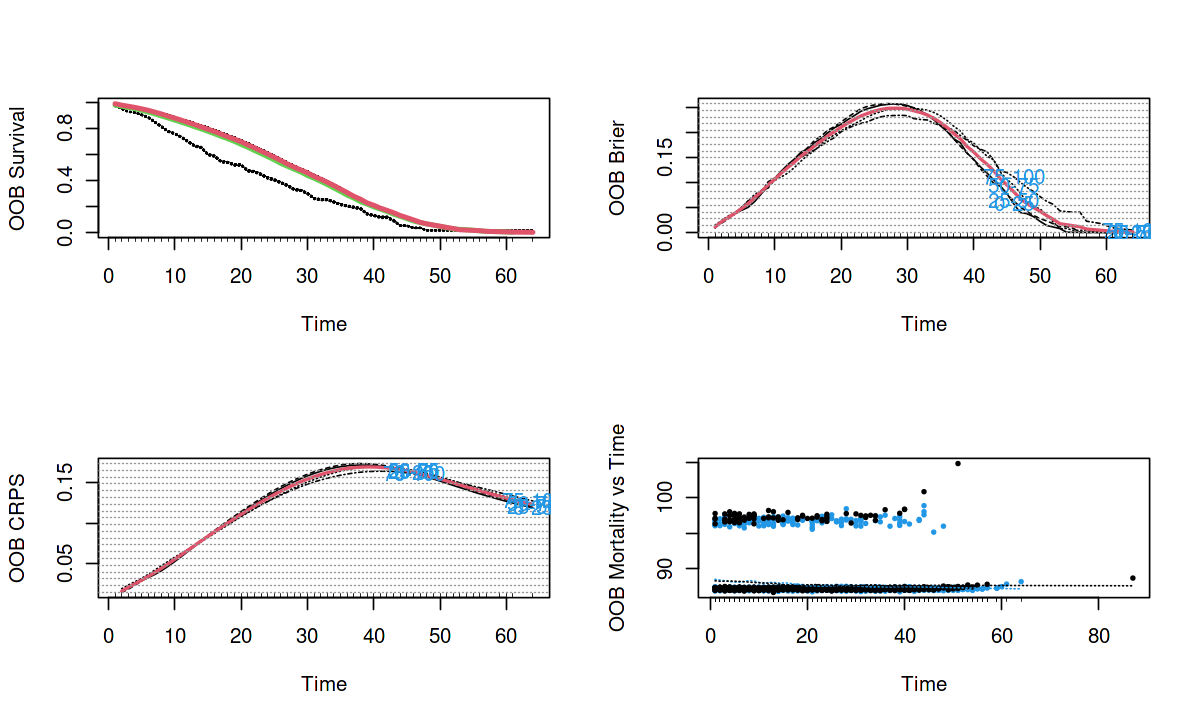

In [189]:
rf_fit <- rfsrc(Surv(life, event) ~ inducted, data = hof_surv)

plot.survival(rf_fit)